# LL- ch2 fit to uSEIR

## May 2020

In [1]:
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

Last updated on  Tue May 26 14:24:00 2020


In [2]:
import numpy as np
import pandas as pd
import matplotlib

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [4]:
## mathplotlib configuration
fontsize = 12
plt.rcParams["figure.figsize"] = 6, 5
plt.rcParams["font.size"     ] = fontsize

#font = {'family': 'serif',
#        'color':  'black',
#        'weight': 'bold',
#        'size': fontsize,
#        }

plt.style.context('seaborn-colorblind');


In [5]:
import scipy.stats  as stats

from scipy.integrate import odeint
import scipy.integrate as spi
from scipy.interpolate import interp1d

In [6]:
import c19.cfit         as cfit

import c19.useir            as us
import c19.kfmysir          as kf

In [7]:
import c19.cfitsir      as cfsir

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
def plot_data(xdata, pars, ufun = us._useir):
    xs, ys = xdata
    yerr   = np.sqrt(ys)
    plt.errorbar(xs, ys, yerr = np.sqrt(ys), ls = '', label = 'data',
                 marker = 'o', ms = 4, c = 'black');
    fun    = us.fmodel(pars, ufun = ufun)
    plt.plot(xs, fun(xs), ls = '--', c = 'blue', label = 'model')
    plt.grid(); plt.legend();
    return

def plot_scan(pars, fun, vals0, vals1, index0 = 0, index1 = 1):
    
    xvals = cfit.scan(pars, fun, index0, vals0)
    plt.figure()
    plt.plot(vals0, xvals - np.min(xvals));

    xvals = cfit.scan(pars, fun, index1, vals1)
    plt.figure()
    plt.plot(vals1, xvals - np.min(xvals));

    xvals = cfit.scan2d(pars, fun, index0, vals0, index1, vals1)

    plt.figure()
    #r0, tm = parshat
    xx, yy = np.meshgrid(vals0, vals1)
    zz     = xvals - np.min(xvals)
    cc = plt.contourf(xx, yy, zz, alpha = 0.5, levels = 20);
    x0, y0 = pars[index0], pars[index1]
    plt.plot(x0, y0, marker = '*', color = 'black', ms = 10);
    plt.colorbar(cc);
    
def ana(ffun, xpars, pars = None):
    pars = xpars if pars is None else pars
    parshat = cfit.minimize(xpars, ffun)
    print('true', pars, ', guess ', xpars, ', best ', parshat)
    fbest, ftrue = np.sum(ffun(parshat)), np.sum(ffun(pars))
    print('f best ', fbest, ', f true ', ftrue, ', f delta ', ftrue - fbest)
    return parshat

## Chi2

Generation

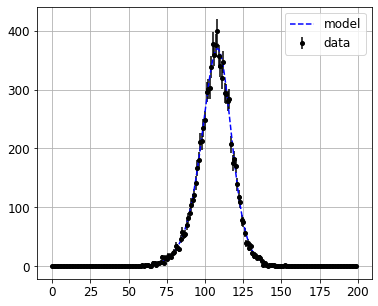

In [10]:
R0, TR   = 3., 5.
ufun = us._useir
pars = (R0, TR)
times, xdata = us.rvs(pars)
xs, ys = xdata

plot_data(xdata, pars, ufun = ufun)

Test chi2 scan

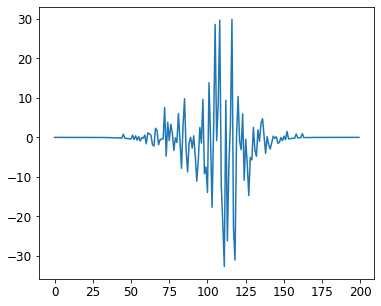

In [11]:
fres  = us.res(xdata, ufun = ufun, sqr = False)
plt.plot(xs, fres(pars));

In [12]:
fchi2 = us.res(xdata, ufun = ufun)
r0s   = np.linspace(2.5, 3.5, 8)
tms   = np.linspace(3  , 7 , 8)

true (3.0, 5.0) , guess  (3.0, 5.0) , best  [2.95234754 4.76098952]
f best  8690.86466408086 , f true  8944.768971378726 , f delta  253.90430729786567


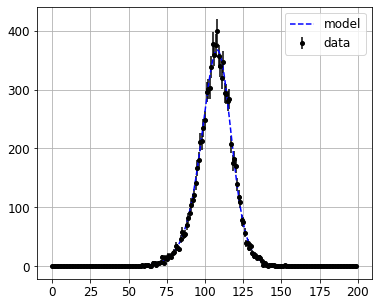

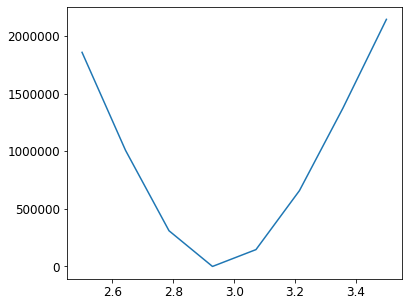

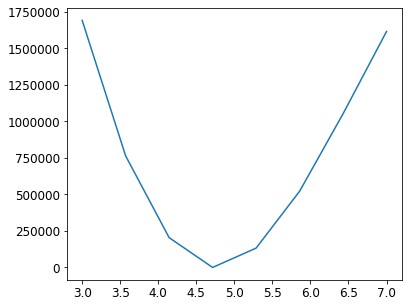

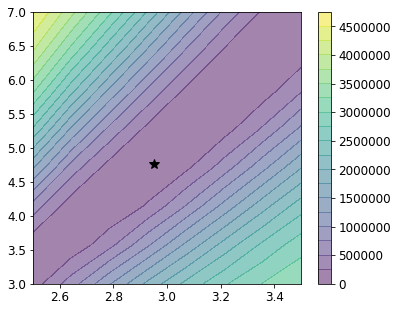

In [13]:
parshat = ana(fchi2, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms)

true (3.0, 5.0) , guess  (2.5, 7) , best  [2.95235041 4.7610022 ]
f best  8690.864664257344 , f true  8944.768971378726 , f delta  253.90430712138186


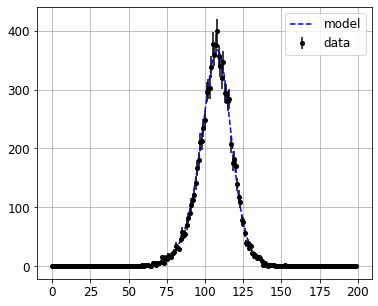

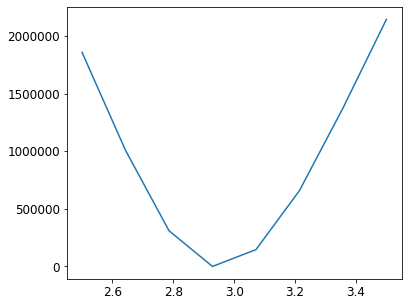

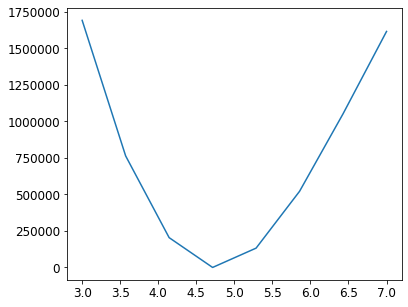

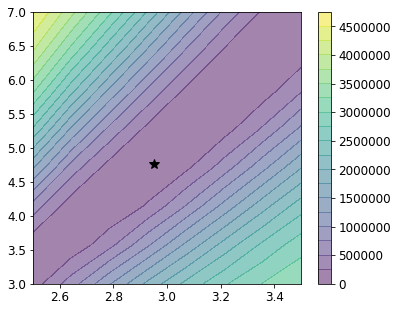

In [14]:
xpars  = (2.5, 7)
parshat = ana(fchi2, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms)

### MLL test

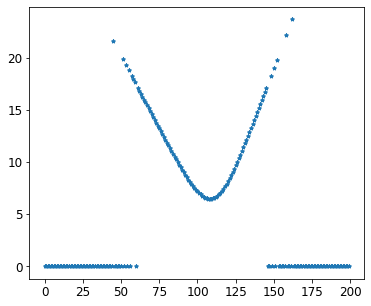

In [15]:
fmle  = us.mll(xdata, ufun = ufun)

lls = fmle(pars)
lls[ys <= 0] = 0.
lls[ys >  0] = lls[ys >0] /ys[ys >0]
plt.plot(xs, lls, ls = '', marker = '*', ms = 4);

true (3.0, 5.0) , guess  (3.0, 5.0) , best  [3.10351632 5.44734494]
f best  71727.24656059893 , f true  71729.95485335299 , f delta  2.7082927540614037


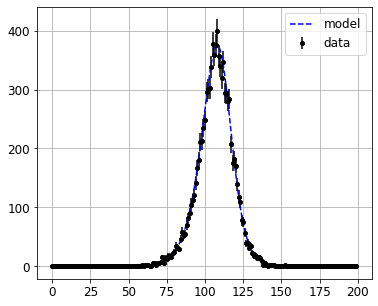

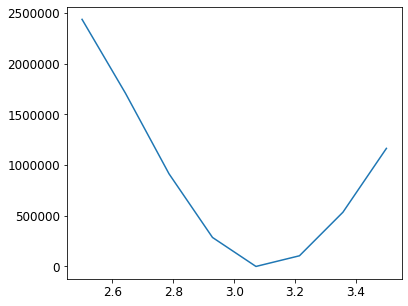

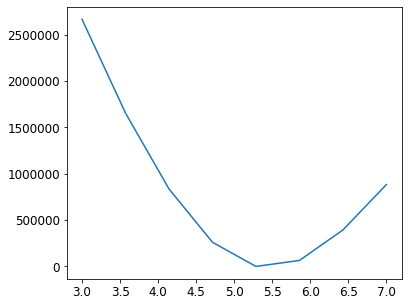

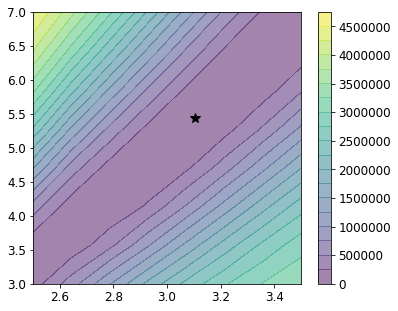

In [16]:
parshat = ana(fmle, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms)

true (3.0, 5.0) , guess  (2.5, 7) , best  [3.10353505 5.44742595]
f best  71727.24656058865 , f true  71729.95485335299 , f delta  2.708292764335056


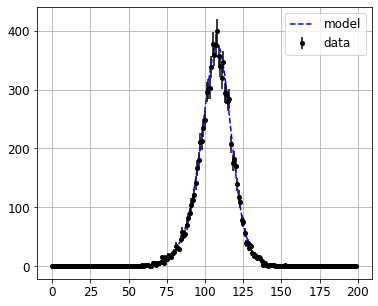

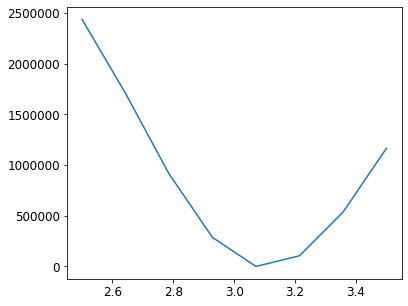

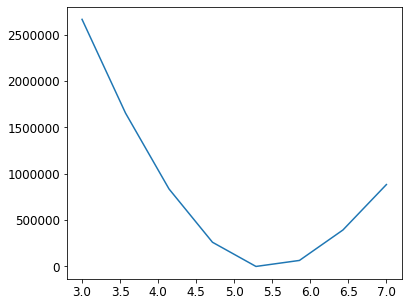

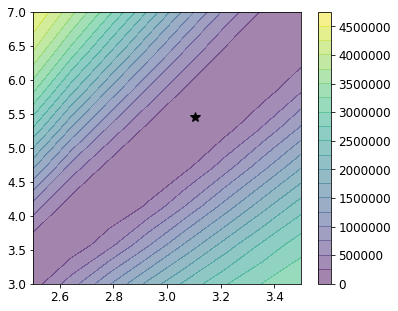

In [17]:
xpars   = (2.5, 7)
parshat = ana(fmle, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms)

## uSEIR-quenched

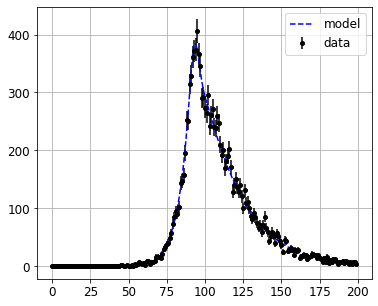

In [18]:
R0, R1, TR = 3.0, 0.8, 5.
ufun = us._useirvar
pars = (R0, R1, TR)
times, xdata = us.rvs(pars, ufun = ufun)

plot_data(xdata, pars, ufun= ufun)

In [19]:
fchi2 = us.res(xdata, ufun = ufun)
r0s   = np.linspace(2.5, 3.5, 8)
tms   = np.linspace(3  , 7 , 8)

true (3.0, 0.8, 5.0) , guess  (2.9, 0.7, 5.4) , best  [3.03055295 0.80299581 5.15874041]
f best  15317.930555930154 , f true  15990.954357058556 , f delta  673.0238011284018


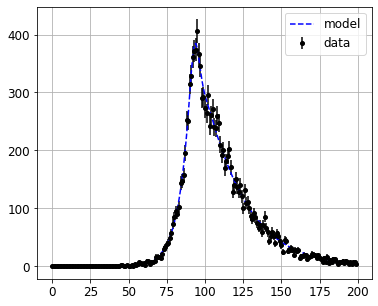

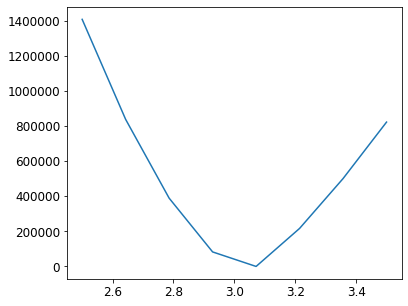

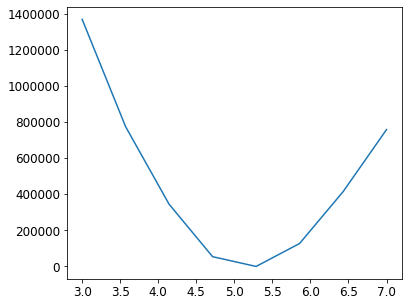

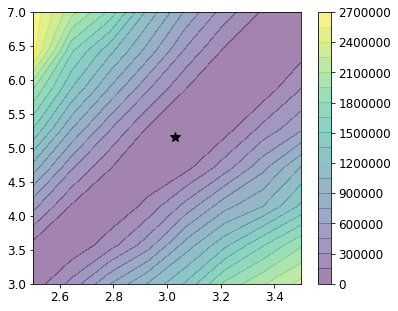

In [20]:
xpars   = (2.9, 0.7, 5.4)
parshat = ana(fchi2, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms, index1 = 2)

true (3.0, 0.8, 5.0) , guess  (2.9, 0.7, 5.4) , best  [2.79934012 0.82423098 4.02059709]
f best  116622.30884995523 , f true  116624.80478324874 , f delta  2.4959332935104612


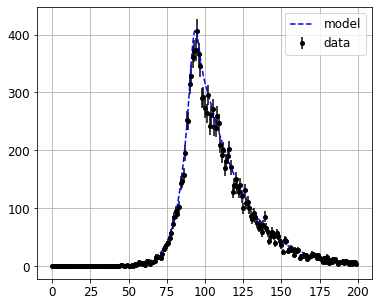

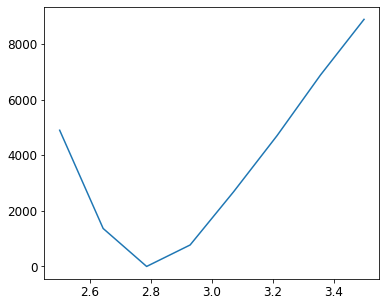

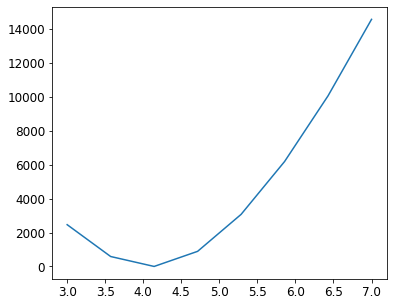

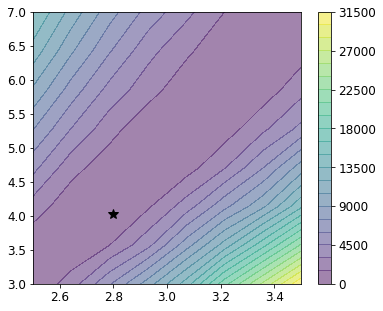

In [21]:
fmle  = us.mll(xdata, ufun = ufun)
xpars   = (2.9, 0.7, 5.4)
parshat = ana(fmle, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fmle, r0s, tms, index1 = 2)

## Free t0

In [22]:
ufun = lambda pars : us._t0(pars, ufun = us._useirvar)

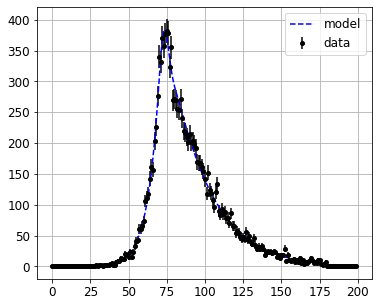

In [23]:
DT0, R0, R1, TR = 20, 3.0, 0.8, 5.
pars = (DT0, R0, R1, TR)

times, xdata = us.rvs(pars, ufun = ufun)
plot_data(xdata, pars, ufun= ufun)

#xpars = (0, R0, R1, TR)
#xtimes, xxdata = us.rvs(xpars, ufun = ufun)
#plot_data(xxdata, xpars, ufun= ufun)

In [24]:
fchi2 = us.res(xdata, ufun = ufun)
r0s   = np.linspace(2.5, 3.5, 8)
tms   = np.linspace(3  , 7 , 8)

true (20, 3.0, 0.8, 5.0) , guess  (20, 2.5, 0.7, 6.4) , best  [21.00004524  3.02541619  0.76633646  5.48286762]
f best  33251.91855831498 , f true  14153.171858921729 , f delta  -19098.746699393254


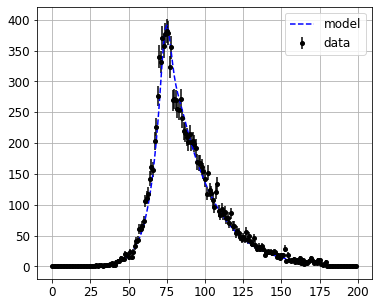

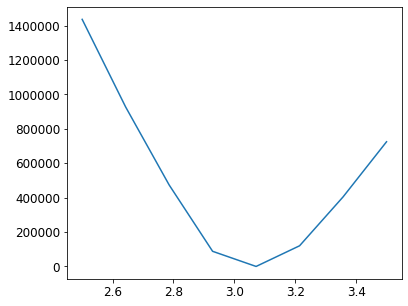

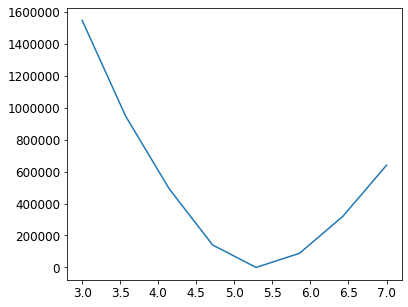

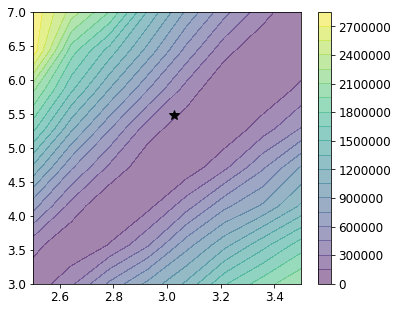

In [25]:
xpars   = (20, 2.5, 0.7, 6.4)
parshat = ana(fchi2, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms, index0 = 1, index1 = 3)

mle: warning
true (20, 3.0, 0.8, 5.0) , guess  (0, 2.9, 0.7, 5.4) , best  [9.80732136e-04 3.15353488e+00 7.84678247e-01 2.48025549e+00]
f best  46118.89351047581 , f true  14153.171858921729 , f delta  -31965.721651554086


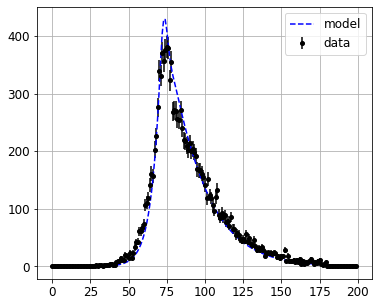

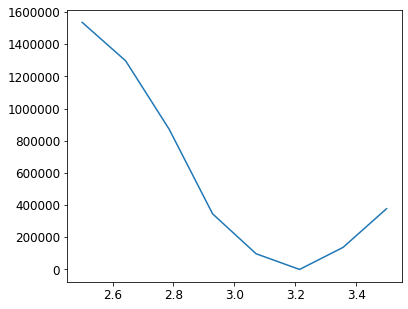

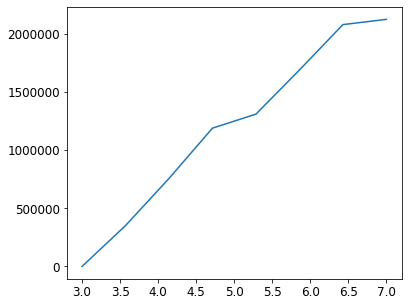

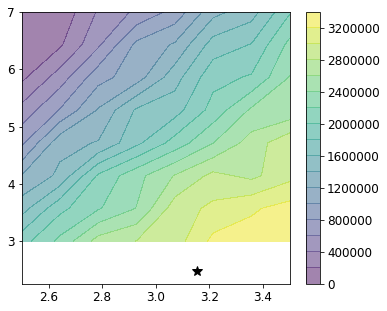

In [26]:
xpars   = (0, 2.9, 0.7, 5.4)
parshat = ana(fchi2, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fchi2, r0s, tms, index0 = 1, index1 = 3)

true (20, 3.0, 0.8, 5.0) , guess  (20, 2.5, 0.7, 6.4) , best  [18.81274699  3.28768271  0.79503658  5.74268244]
f best  116031.92004793236 , f true  116012.23936221065 , f delta  -19.680685721716145


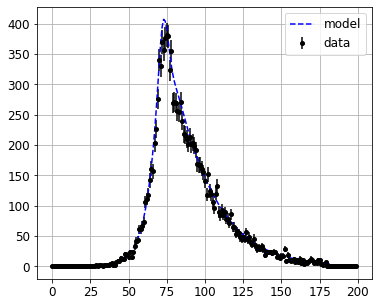

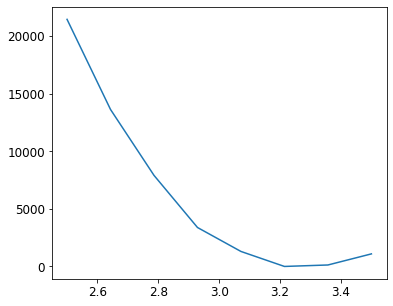

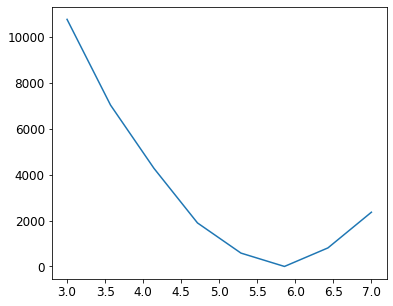

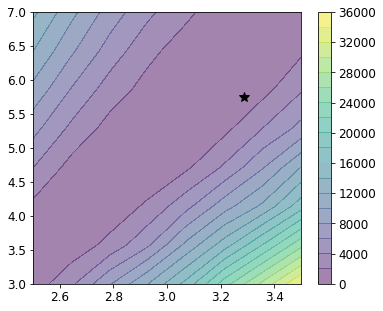

In [27]:
fmle  = us.mll(xdata, ufun = ufun)
xpars   = (20, 2.5, 0.7, 6.4)
parshat = ana(fmle, xpars, pars)
plot_data(xdata, parshat, ufun = ufun)
plot_scan(parshat, fmle, r0s, tms, index0 = 1, index1 = 3)

## Conclusions

- There is a correlation between R0 and TR, maybe it is better to use beta, TM (seen in the (R0, TM) chi2, mle scan

- There is a strong correlation betting T0 and TR, TR tends to absorbs the value of T0. If you chande T0 to 0. then TR moves from 5 to 1.8 both in chi2 and mle and the model fits "nicely" the data. 

- Probe with an iterative method, providing 'reasonable' inputs